# Pourquoi la convolution ?

Un des pré-requis à l'entraînement de réseaux de neurones dédiés au traitement de l'image est aujourd'hui la **convolution**.

Les réseaux de neurones convolutifs, les _CNN_, occupent aujourd'hui en santé une place majeure : classification, segmentation, survie, marqueurs pronostics, etc.

**Pourquoi utilise-t-on aujourd'hui _presque_ exclusivement ce type d'opération mathématique pour analyser nos images ?**

Réponse courte : les _CNN_ peuvent extraire automatiquement des informations morphologiques qui échappent à un oeil expert, pour un coup computationnel bien plus faible que les architectures classiques comme les _perceptrons_. Ces réseaux permettent de mieux capturer la complexité inhérente aux images qu'ils analysent.

## Brève histoire de l'apprentissage profond (et de la convolution)

### **Première modélisation mathématique et informatique d’un neurone biologique : W. McCulloch et W. Pitts (1943).**

<img src="https://cs231n.github.io/assets/nn1/neuron.png" width="400">

<img src="https://cs231n.github.io/assets/nn1/neuron_model.jpeg" width="400">

Le premier modèle mathématique et informatique du neurone biologique est proposé par Warren McCulloch et Walter Pitts en 1943. En s'appuyant sur les propriétés des neurones biologiques connues à cette époque, issues d'observations neurophysiologiques et anatomiques, McCulloch et Pitts proposent un modèle simple de neurone formel. Il s'agit d'un neurone binaire, c'est-à-dire dont la sortie vaut 0 ou 1. Pour calculer cette sortie, le neurone effectue une somme pondérée de ses entrées. Ces entrées ($x_0, x_1, ..., x_N$) sont perçues au niveau des synapses (région de contact), et en tant que sorties d'autres neurones formels, valent aussi 0 ou 1. Ces stimulations, avant d'être transmis au coeur de la cellule, sont pondérées ($w_0, w_1, ..., w_N$) de telle sorte qu'aux différentes informations transmises (_e.g._ influx électriques), une priorisation a lieu, et _a fortiori_ un blocage de certaines informations $w_i=0$. Les signaux plus ou moins atténués (inhibés) ou renforcés (excités) ($w_i x_i$) sont transmis par les dendrites vers le coeur de la cellule. Cette somme pondérée de signaux active ou non le neurone qui applique une fonction d'actiation à un seuil : si la somme pondérée dépasse une certaine valeur, la sortie du neurone est 1, sinon elle vaut 0 (cf les sections suivantes). ([1])

**Malgré la simplicité de cette modélisation, ou peut-être grâce à elle, le neurone formel dit de McCulloch et Pitts reste aujourd’hui un élément de base des réseaux de neurones artificiels. De nombreuses variantes ont été proposées, plus ou moins biologiquement plausibles, mais s'appuyant généralement sur les concepts inventés par les deux auteurs. On sait néanmoins aujourd’hui que ce modèle n’est qu’une approximation des fonctions remplies par le neurone réel et, qu’en aucune façon, il ne peut servir pour une compréhension profonde du système nerveux.** ([1])

Dans leur formulation d'origine, la fonction d'activation est la fonction de _Heaviside_, qui est une marche d'escalier binaire (elle passe de 0 à 1 en $x=0$).

[1] https://fr.wikipedia.org/wiki/Neurone_formel


### **Le perceptron de Rosenblatt (1957)**.

<img src="https://static.javatpoint.com/tutorial/tensorflow/images/single-layer-perceptron-in-tensorflow2.png" width="400">

Le perceptron est l'ancêtre du réseau de neurones, et en cela sa version la plus simple. Un perceptron dispose de $N$ entrées $(x_1,..., x_N)$ et une seule sortie $\hat{y}$. Cette sortie est définie comme précédemment : $\hat{y}=1$ si $\sum_i w_i x_i > b$ sinon 0.

Si on note $z = \sum_i w_i x_i - b$, alors, $\hat{y}=H(z)$ avec $H$ la fonction de Heaviside, qui vaut $0$ si $z < 0$, $1$ si $z \geq 0$.

<img src="https://ars.els-cdn.com/content/image/3-s2.0-B9780128124635000029-f02-02-9780128124635.gif" width="200">



**La règle d'apprentissage du perceptron ou loi de Widrow-Hoff (1949).**

La règle de Widrow-Hoff est légèrement différente de la première règle d'apprentissage des réseaux de neurones artificiels de Hebb. 
Voici la règle de W-H :

$$w_i^{(t+1)} \leftarrow w_i^{(t)} + \alpha (y-\hat{y}^{(t)}) x_i$$

avec $\alpha$ le fameux taux d'apprentissage.

Admettons que $y-\hat{y}^{(t)} \neq 0$, cela correspond à 2 cas de figures :
- soit $y=1$ et $\hat{y}^{(t)}=0$ (différence positive, cas 1)
- soit $y=0$ et $\hat{y}^{(t)}=1$ (différence négative, cas 2)

Dans le premier cas, on s'aperçoit donc que le neurone formel, à l'itération $t$, a "conclu" qu'il ne devait transmettre d'information au vu des différents signaux d'entrée $(x_1, ..., x_N)$; alors qu'en réalité, il aurait dû ! Dans ce cas, la différence est bien positive. Pour y remédier, on va augmenter le poids associé à l'entrée binaire $x_i$ avec la règle ci-dessus. Si $x_i=0$, $w_i$ reste inchangé (c'est normal, il n'y a de toute façon pas d'information à transmettre). Mais si $x_i=1$, alors $w_i$ devient $w_i + \alpha$. 
Dans le second cas, on procède à l'inverse : le poids donné à l'information $x_i$ étant trop élevée, on l'abaisse. 

Si $\alpha$ est grand, alors les modifications des poids pour les $x_i=1$ vont être d'autant plus grande : on va donc très rapidement explorer l'espace, on apprend vite au risque cependant de ne pas tomber dans la zone de l'espace qui nous garantit les poids optimaux.
A l'inverse, si $\alpha$ est petit, nous sommes "prudents" et préférons exploiter l'espace de recherche, en explorant peu. L'avantage est, si l'on trouve une zone de l'espace d'optimisation favorable, de suffisamment l'exploiter pour arriver à une configuration presque optimale. En revanche, si, dès le départ, les poids sont modifiés selon une configuration sous-optimale, on risque de rester dans cette région de l'espace.

**Cette règle est très semblable à l'algorithme de descente de gradient, qui est à l'oeuvre dans les processus d'entraînement des réseaux de neurones artificiels.**

<img src="https://i.ytimg.com/vi/b4Vyma9wPHo/maxresdefault.jpg" width="400">

<img src="http://ludovicarnold.altervista.org/wp-content/uploads/2015/01/gradient-trajectory.png" width="400">


**Théorème d'approximation universelle de Hornik (1991).**

Hornik montre en 1991 que toute fonction bornée et régulière de $\mathbb{R}^d \rightarrow \mathbb{R}$ peut être approximée par un perceptron possédant un nombre **fini** de neurones, la même fonction d'activation $\phi$, et une sortie linéaire, ceci pour n'importe quelle précision $\epsilon$.

Une fonction régulière est _grosso modo_ une fonction infiniment dérivable $\mathcal{C}^{\infty}$, comme ici une fonction s'exprimant en 2D.

<img src="https://upload.wikimedia.org/wikipedia/commons/2/24/Bump2D_illustration.png" width="400">

**Du percetron mono-couche à multi-couches (1957).**

L'inconvénient majeur des premiers réseaux de neurones est qu'il n'étaient pas en mesure de résoudre des problèmes non linéaires. En effet, historiquement, les fonctions d'activation utilisées dans le cadre de l'implémentation de ces algorithmes étaient tout au plus linéaires. Or, il est facile de montrer que si l'on empile les couches de neurones les unes après les autres, et que l'on utilise des activations linéaires (c'est à dire une fonction linéaire qui _map_ les entrées pondérées à la sortie), alors n'importe quel perceptron multi-couches de ce type peut être réduit à un perceptron à 2 couches : entrée et sortie, arbitrairement grand.

L'introduction de fonctions d'activations non-linéaires comme la fonction sigmoide ou tangente hyperbolique, a changé la donne : désormais, il est possible d'activer non-linéairement un neurone; et donc d'introduire des relations non-linéaires entre les sorties et les entrées.

<img src="https://miro.medium.com/max/1200/1*ZafDv3VUm60Eh10OeJu1vw.png" width="400">


<img src="https://playandlearntocode.com/static/siteapp/assets/articles/mlp-1/mlp-1-nodes.png" width="400">

Un perceptron multi-couche est une simple généralisation du perceptron original. Il est composé d'une couche d'entrée, des couches intermédiaires dites "cachées", et une couche de sortie. Chacune des neurones utilise des activations non-linéaires. 

Les travaux de Paul Werbos (1974) puis David Rumelhart (1986), inventeurs de la _backpropagation_, ont rendu possible l'optimisation des MLP (_Multi Layer Perceptron_). En effet, cette méthode permet d'utiliser n'importe quelle fonction d'activation non-linéaire, du moment que celle-ci est différentiable, comme la fonction sigmoid ou ReLU par exemple.

La mise en place d'un MLP pour résoudre un problème de régression ou de classification, nécessite de déterminer de manière optimale les poids applicables à chacune des connexions inter-neuronales (sur le schéma, $w_{i,j,k}$ avec $i$ la couche cachée, $j$ le neurone d'entrée de la couche cachée $i$ et $k$ le neurone de sortie de la couche $i+1$.

**Backpropagation.**
_Schémas tirés du très bon blog : https://ranasinghiitkgp.medium.com/non-linear-binary-classification-using-neural-network-with-forward-and-back-propagation-sample-8f30af254b9e_.

Ce premier schéma nous explique les quantités à l'oeuvre dans un perceptron multi-couches. Cette généralisation à plusieurs couches implique d'utiliser des notations matricielles et non plus vectorielles.

<img src="https://miro.medium.com/proxy/1*95RWKvVOFvC8FDfnyeC1RA.png" width="800">


Cet autre schéma introduit la notion de gradient et la **_chain rule_** ou théorème de dérivation des fonctions composées (introduction du concept ici : https://fr.wikipedia.org/wiki/Th%C3%A9or%C3%A8me_de_d%C3%A9rivation_des_fonctions_compos%C3%A9es)


<img src="https://miro.medium.com/proxy/1*4x1KP5r3nTW2IpUq3BBk1A.png" width="800">


Enfin, de manière schématique, on retrouve la méthode de mise à jour des gradients comme vu lors de la présentation du percetron mono-couche.

<img src="https://miro.medium.com/proxy/1*UDslBPo8hSloFPPZoyCgPA.png" width="800">


## Implémentation d'un perceptron multi-couches

On importe quelques packages utiles pour la suite.

In [1]:
from typing import Tuple

import tensorflow as tf
import tensorflow_datasets as tfds

Puis on réalise un point de montage avec le contenu de notre drive.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

On charge le data set MNIST.

In [30]:
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    data_dir='/content/gdrive/MyDrive/data/',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

On affiche les chiffres à classifier.

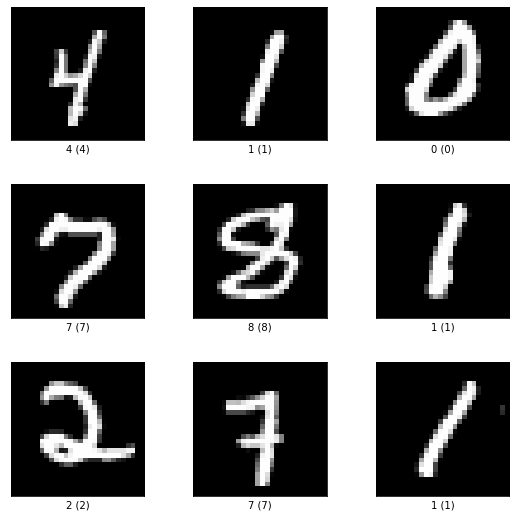

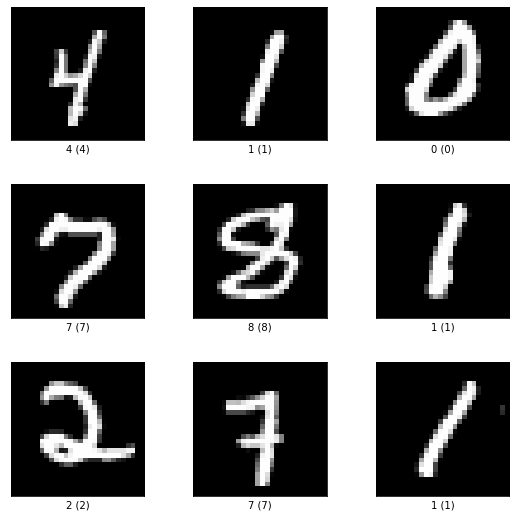

In [31]:
tfds.visualization.show_examples(ds_train, ds_info)

Puis les informations d'intérêt sur ce data set.

In [32]:
print(ds_info)

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_path='datasets/mnist/3.0.1',
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
)


Comme précédemment, on convertit en format _floattant_. Pas besoin de normaliser car les images sont en noir et blanc !

In [4]:
def normalize_img(image: tf.Tensor, label: tf.Tensor) -> Tuple[tf.Tensor, tf.Tensor]:
    """Conversion et normalisation."""
    img = tf.cast(image, tf.float32) / 255.
    return img, label

In [ ]:
# on applique les transformations de manière parallélisée.
ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE
)
# on cache de manière à faire la transformation précédente une seule fois
# au début de l'entraînement.
ds_train = ds_train.cache()
# on permute aléatoirement les exemples.
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
# on constitue des batches de taille 128.
ds_train = ds_train.batch(128)
# enfin, on demande à Tensorflow de traiter la donnée
# même si le GPU est en train de calculer (système de queue).
ds_train = ds_train.prefetch(tf.data.experimental.AUTOTUNE)

De la même manière, on construit l'échantillon de test.

In [5]:
ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.experimental.AUTOTUNE)

Enfin, on implémente un MLP à 1 couche cachée de taille : 784 (entrée), 128 (cachée) et 10 (sortie).
Pour cela, on aplatit les images en un seul et même vecteur de taille $28\times 28=784$.

In [12]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # entrée
  tf.keras.layers.Dense(128, activation='relu'), # couche cachée
  tf.keras.layers.Dense(10, activation='softmax') # couche de sortie
])
# on définit un optimiseur pour l'entraînement.
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)
# on entraîne sur 20 epochs.
model.fit(
    ds_train,
    epochs=20,
    validation_data=ds_test,
)

Epoch 1/20
469/469 [==============================] - 1s 2ms/step - loss: 1.7781 - sparse_categorical_accuracy: 0.6314 - val_loss: 0.6085 - val_sparse_categorical_accuracy: 0.8626
Epoch 2/20
469/469 [==============================] - 1s 2ms/step - loss: 0.5422 - sparse_categorical_accuracy: 0.8679 - val_loss: 0.3851 - val_sparse_categorical_accuracy: 0.8995
Epoch 3/20
469/469 [==============================] - 1s 2ms/step - loss: 0.3760 - sparse_categorical_accuracy: 0.8987 - val_loss: 0.3255 - val_sparse_categorical_accuracy: 0.9114
Epoch 4/20
469/469 [==============================] - 1s 2ms/step - loss: 0.3289 - sparse_categorical_accuracy: 0.9066 - val_loss: 0.2975 - val_sparse_categorical_accuracy: 0.9163
Epoch 5/20
469/469 [==============================] - 1s 2ms/step - loss: 0.3033 - sparse_categorical_accuracy: 0.9122 - val_loss: 0.2796 - val_sparse_categorical_accuracy: 0.9197
Epoch 6/20
469/469 [==============================] - 1s 2ms/step - loss: 0.2800 - sparse_categorica

**Nombre de paramètres requis pour l'entraînement.**

In [13]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## Comparaison avec un petit réseau convolutif

**Faisons la même chose mais entraînons un réseau convolutif...**

In [26]:
model = tf.keras.models.Sequential([
    # première couche de convolutions en 2D.
    tf.keras.layers.Conv2D(32, (2, 2), activation='relu'),
    # premier pooling.
    tf.keras.layers.MaxPooling2D((2, 2)),
    # deuxième couche de convolutions en 2D.
    tf.keras.layers.Conv2D(32, (2, 2), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    # troisième couche de convolutions en 2D.
    tf.keras.layers.Conv2D(32, (2, 2), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    # quatrième couche de convolutions en 2D.
    tf.keras.layers.Conv2D(32, (2, 2), activation='relu'),
    # on transforme la sortie en un vecteur 1D.
    tf.keras.layers.Flatten(),
    # et on applique un softmax.
    tf.keras.layers.Dense(10, activation='softmax')
])
# on définit un optimiseur pour l'entraînement.
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)
# on entraîne sur 20 epochs.
model.fit(
    ds_train,
    epochs=20,
    validation_data=ds_test,
)

Epoch 1/20
469/469 [==============================] - 3s 4ms/step - loss: 1.8394 - sparse_categorical_accuracy: 0.3357 - val_loss: 0.5138 - val_sparse_categorical_accuracy: 0.8386
Epoch 2/20
469/469 [==============================] - 2s 3ms/step - loss: 0.4919 - sparse_categorical_accuracy: 0.8468 - val_loss: 0.3565 - val_sparse_categorical_accuracy: 0.8880
Epoch 3/20
469/469 [==============================] - 1s 3ms/step - loss: 0.3555 - sparse_categorical_accuracy: 0.8890 - val_loss: 0.2852 - val_sparse_categorical_accuracy: 0.9133
Epoch 4/20
469/469 [==============================] - 1s 3ms/step - loss: 0.2945 - sparse_categorical_accuracy: 0.9089 - val_loss: 0.2655 - val_sparse_categorical_accuracy: 0.9155
Epoch 5/20
469/469 [==============================] - 1s 3ms/step - loss: 0.2575 - sparse_categorical_accuracy: 0.9196 - val_loss: 0.2305 - val_sparse_categorical_accuracy: 0.9267
Epoch 6/20
469/469 [==============================] - 2s 3ms/step - loss: 0.2251 - sparse_categorica

**Nombre de paramètres requis pour l'entraînement.**

In [27]:
model.summary() # 12 874 contre 101 770 précédemment...

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 27, 27, 32)        160       
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 12, 12, 32)        4128      
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 5, 5, 32)          4128      
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 2, 2, 32)          0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 1, 1, 32)        

Ici semble se dessiner un premier indice de pourquoi plus personne n'utilise de MLP pour analyser les images, mais plutôt des réseaux convolutifs : **le nombre de paramètres est plus faible** tandis que **la convolution semble également mieux capturer l'information importante pour classer les images**.

## Convolution : motivations

Bien qu'efficaces pour le traitement d'images, les perceptrons multicouches (MLP) ont des difficultés à gérer des images de grande taille, en raison de la croissance exponentielle du nombre de connexions avec la taille de l'image, du fait que chaque neurone est « totalement connecté » à chacun des neurones de la couche précédente et suivante.

#### **La conception des réseaux de neurones convolutifs suit la découverte de mécanismes visuels dans les organismes vivants.**

Début 1968 (Hubel), des travaux ont montré chez l'animal que le cortex visuel contient des arrangements complexes de cellules de la rétine dites **ganglionnaires**. Chaque cellule ganglionnaire de la rétine signale par une augmentation de sa fréquence de décharge l’apparition d’un **contraste chromatique ou de luminance** dans une petite fenêtre du champ visuel de l'oeil humain. Cette région d'activation est appelée le **champ récepteur** du neurone (Bullier, 2002 ; Hubel, 1994 ; Fitzpatrick, 2000). Il s’agit de la zone du champ visuel qui influence l’activité d’une cellule. 

Il existe 120 millions de bâtonnets, 6 millions de cônes et 1,5 millions de cellules ganglionnaires (Schwartz, 1999 ; Wandell, 1995). Les cellules ganglionnaires signalent le résultat d’une comparaison entre **la quantité de lumière atteignant une région de la rétine et la quantité de lumière qui atteint le pourtour de cette région**. Les champs récepteurs des cellules dites naines et en parasol font que ces dernières répondent de **façon préférentielle au contraste et pas à une luminance absolue**. Ceci implique que l’information de surface est perdue : les cellules répondent si un contour (un contraste noir/blanc) correctement placé atteint leur champ récepteur (la limite entre deux formes est indiquée par une différence de contraste ; Hubel, 1994 ; Schwartz, 1999 ; Wandell, 1995). **Les bords d’une forme visuelle sont donc encodés dès les premiers niveaux de traitement.**

Le champ récepteur d’une cellule ganglionnaire comprend deux régions concentriques : le **centre** qui est la région la plus sensible et le **pourtour** qui a une action antagoniste à celle du centre. Deux types fonctionnels de neurones sont distingués : les neurones à centre-on et à centre-off. **L’activité des neurones à centre-on s’accroît lorsque le contraste de luminance augmente entre le centre et le pourtour du champ récepteur. Ainsi, une cellule à centre-on décharge avec une fréquence plus élevée lorsqu’une tache de lumière est présentée précisément au centre du champ récepteur et que son pourtour n’est pas éclairé. La réponse de cette cellule est faible ou nulle lorsque son champ récepteur est totalement éclairé.**

<img src="http://theses.univ-lyon2.fr/documents/getpart.php?id=570&file=pic02.gif" width="400">
Palmer et al., 1999

#### **Implications sur le traitement d'une image**

Dans le cadre de la reconnaissance d'image, on va donc paver cette dernière de multiple zones régulières ou tuiles. **Chaque tuile sera traitée individuellement par un neurone artificiel (une cellule ganglionnaire, qui effectue une opération de filtrage classique en associant un poids à chaque pixel de la tuile).**

**Tous les neurones ont les mêmes paramètres de réglage, pour rendre compte du caractère uniforme du traitement de l'entrée lumineuses des cellules ganglionnaires**. Le fait d'avoir le même traitement (mêmes paramètres), légèrement décalé pour chaque champ récepteur, s'appelle une convolution. Cette strate de neurones avec les mêmes paramètres est appelée « noyau de convolution ».

Cette animation permet de comprendre l'opération d'une convolution et le concept de noyau. Ici, on choisit un noyau qui va venir "scanner" les différentes régions de l'image.

$$ 
\begin{pmatrix}
0 & 1 & 2 \\
2 & 2 & 0 \\
0 & 1 & 2
\end{pmatrix}
$$

<img src="https://miro.medium.com/max/535/1*Zx-ZMLKab7VOCQTxdZ1OAw.gif" width="200">




Autre example avec un image RVB (en 3D).



<img src="https://miro.medium.com/max/700/1*ciDgQEjViWLnCbmX-EeSrA.gif" width="800">




En pratique, les **champs récepteurs se chevauchent** (comme sur l'image) afin d'obtenir une meilleure représentation de l'image originale ainsi qu'une meilleure cohérence du traitement au fil des couches de traitement. Le chevauchement est défini par le pas (décalage entre deux champs récepteurs adjacents) ou **_stride_**. 



Les pixels d'une tuile sont analysés globalement. Dans le cas d'une image en couleur, un pixel contient 3 entrées (rouge, vert et bleu), qui seront traitées globalement par chaque neurone. Donc l'image peut être considérée comme un volume, et notée par exemple 30 × 10 × 3 pour 30 pixels de largeur, 10 de hauteur et 3 de profondeur correspondant aux 3 canaux rouge, vert et bleu. De manière générale, on parlera de « volume d'entrée ». 

### Visualisation de certains noyaux de convolution de référence pour fixer la notion

https://setosa.io/ev/image-kernels/

#### Méthodes implémentées sur `scikit-image`.

In [98]:
from skimage import filters
from skimage import data
import matplotlib.pyplot as plt

In [84]:
print(f"Transformations : {[d for d in dir(filters) if not d.startswith('_')]}")

Transformations : ['LPIFilter2D', 'apply_hysteresis_threshold', 'difference_of_gaussians', 'edges', 'farid', 'farid_h', 'farid_v', 'frangi', 'gabor', 'gabor_kernel', 'gaussian', 'hessian', 'inverse', 'laplace', 'lpi_filter', 'median', 'meijering', 'prewitt', 'prewitt_h', 'prewitt_v', 'rank', 'rank_order', 'ridges', 'roberts', 'roberts_neg_diag', 'roberts_pos_diag', 'sato', 'scharr', 'scharr_h', 'scharr_v', 'sobel', 'sobel_h', 'sobel_v', 'threshold_isodata', 'threshold_li', 'threshold_local', 'threshold_mean', 'threshold_minimum', 'threshold_multiotsu', 'threshold_niblack', 'threshold_otsu', 'threshold_sauvola', 'threshold_triangle', 'threshold_yen', 'thresholding', 'try_all_threshold', 'unsharp_mask', 'wiener', 'window']


In [86]:
camera = data.camera() # noir et blanc
coffee = data.coffee() # rvb

#### Visualisation de certaines transformations

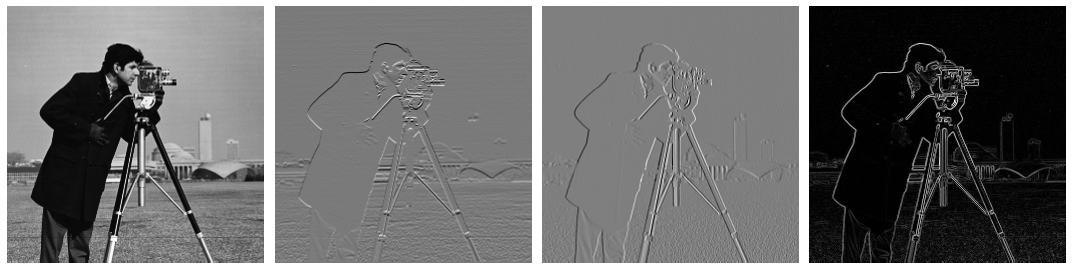

In [102]:
plt.figure(figsize=(15, 5))
plt.subplot(141)
plt.imshow(camera, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.subplot(142)
plt.imshow(filters.sobel_h(camera), cmap='gray', interpolation='nearest')
plt.axis('off')
plt.subplot(143)
plt.imshow(filters.sobel_v(camera), cmap='gray', interpolation='nearest')
plt.axis('off')
plt.subplot(144)
plt.imshow(filters.sobel(camera), cmap='gray', interpolation='nearest')
plt.axis('off')
plt.tight_layout()
plt.show()

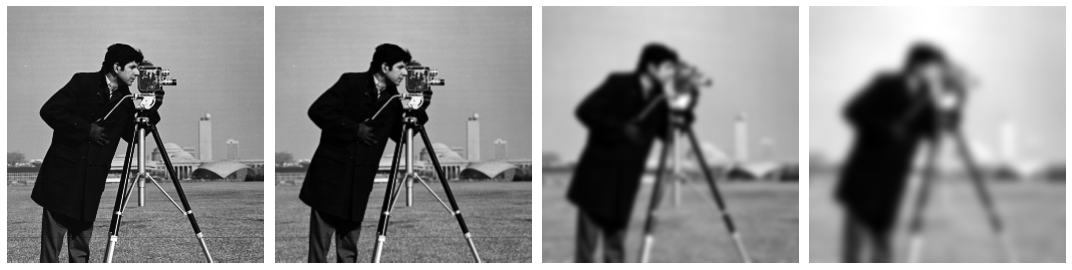

In [108]:
plt.figure(figsize=(15, 5))
plt.subplot(141)
plt.imshow(camera, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.subplot(142)
plt.imshow(filters.gaussian(camera, sigma=1), cmap='gray', interpolation='nearest')
plt.axis('off')
plt.subplot(143)
plt.imshow(filters.gaussian(camera, sigma=5), cmap='gray', interpolation='nearest')
plt.axis('off')
plt.subplot(144)
plt.imshow(filters.gaussian(camera, sigma=10), cmap='gray', interpolation='nearest')
plt.axis('off')
plt.tight_layout()
plt.show()

Comme on l'a vu sur le site précédent, un noyau de convolution va **faire ressortir certaines caractéristiques saillantes de l'image d'entrée**. 

**Pour analyser plusieurs caractéristiques, on va empiler des strates de noyaux de convolution indépendants, chaque strate analysant une caractéristique de l'image.**

**L'ensemble des strates ainsi empilées forme la « couche de traitement convolutif »** ou **convolutional layer**, qu'il faut voir en fait comme un volume (souvent appelé « volume de sortie »). Le nombre de strates de traitement (ou **filters**) s'appelle la profondeur de la couche de convolution (à ne pas confondre avec la profondeur d'un réseau de neurones convolutifs qui compte le nombre de couches de convolution).


<img src="https://miro.medium.com/max/1992/0*U5Ej4yTMTQBfyr_N.png" width="400">





<img src="https://miro.medium.com/max/1898/0*R52u4buyPfabCeyV.png" width="400">




<img src="https://images4.programmersought.com/795/e2/e2809fb699bfbab4ea40ff1fea956813.png" width="400">




Pour résumé, l'essentiel d'un _CNN_ est assuré par les neurones de traitement, qui traitent une portion limitée de l'image (appelée « **champ réceptif** ») au travers d'une fonction de **convolution**. **Les réseaux de neurones convolutifs visent à limiter le nombre d'entrées tout en conservant la forte corrélation « spatialement locale » des images naturelles.**

Les 3 grands avantages de la convolution sont les suivants :

- **Connectivité locale** : grâce au champ récepteur qui limite le nombre d'entrées du neurone (par exemple $3\times 3$), les réseaux de neurones convolutifs assurent ainsi que les filtres produisent **la réponse la plus forte à un motif d'entrée spatialement localisé, ce qui conduit à une représentation parcimonieuse de l'entrée. De plus, le nombre de paramètres à estimer étant réduit, leur estimation (statistique) est plus robuste pour un volume de données fixé (comparé à un MLP).** Au travers du processus d'optimisation, chaque filtre va se spécialiser dans une caractéristique spéciale de l'image; caractéristique qui s'avère pertinente pour la prédiction finale.

- **Poids partagés** : dans les réseaux de neurones convolutifs, les paramètres de filtrage d'un neurone (pour un champ récepteur donné) sont identiques pour tous les autres neurones d'un même noyau (traitant tous les autres champs récepteurs de l'image), ce qui ccupe moins d'espace en mémoire. 

- **Invariance à la translation** : comme tous les neurones d'un même noyau (filtre) sont identiques, le motif détecté par ce noyau est indépendant de localisation spatiale dans l'image.
    

### Profondeur, stride et padding

Trois hyperparamètres permettent de dimensionner le volume de la couche de convolution (aussi appelé volume de sortie) : la profondeur (**depth**), le pas (**stride**) et la marge (**pad**).

- **Depth** : nombre de noyaux de convolution (ou nombre de neurones associés à un même champ récepteur).
- **Stride** : contrôle le chevauchement des champs récepteurs. Plus le pas est petit, plus les champs récepteurs se chevauchent et plus le volume de sortie sera grand.
- **Pad** : La marge (à 0) ou zero padding : parfois, il est commode de mettre des zéros à la frontière du volume d'entrée. Cette marge permet de contrôler la dimension spatiale du volume de sortie. En particulier, il est parfois souhaitable de conserver la même surface que celle du volume d'entrée.

Illustration d'un _stride_=2 :

<img src="https://miro.medium.com/max/395/1*1VJDP6qDY9-ExTuQVEOlVg.gif" width="200">

Illustration du _padding_ : 

<img src="https://miro.medium.com/max/395/1*nYf_cUIHFEWU1JXGwnz-Ig.gif" width="200">

### Pooling

Un autre concept important des CNNs est le **pooling**, ce qui est une forme de sous-échantillonnage (ou _downsampling_) de l'image. Le pooling réduit la taille spatiale d'une image intermédiaire, réduisant ainsi la quantité de paramètres et de calcul dans le réseau. **Il est donc fréquent d'insérer périodiquement une couche de pooling entre deux couches convolutives successives d'une architecture de réseau de neurones convolutifs pour réduire le sur-apprentissage.**

**Très important : l'opération de pooling crée aussi une forme d'invariance par translation et rotation.** En effet, celui-ci permet de garder les features les plus saillantes sur l'image (ou ses représentations intermédiaires), peu importe la localisation initiale de celle-ci. 

La forme la plus courante est une couche de _pooling_ de taille 2 × 2 (largeur/hauteur) et comme valeur de sortie la valeur maximale en entrée (_max-pooling_). On parle dans ce cas de « Max-Pool 2x2 » (compression d'un facteur 4). Il est aussi possible d'éviter la couche de pooling30 mais cela implique un risque de sur-apprentissage plus important. 


<img src="https://miro.medium.com/max/2400/1*KQIEqhxzICU7thjaQBfPBQ.png" width="400">

### Couche d'activation non-linéaire

La convolution est une opération purement linéaire (produit de matrice). De fait, sans activation non-linéaire, il serait bien difficile de modéliser des relations non-linéaires et donc relativement complexes, entre les images d'entrée et la sortie (_i.e._ la prédiction). 

Ces dernières années c'est imposé l'activation dite ReLU pour **Rectified Linear Unit** (2010, Nair, Vinod and Hinton, Geoffrey E.  Rectified linearunits  improve  restricted  Boltzmann  machines. Cette fonction d'activation présente l'immense intérêt d'agir à la fois comme un moyen efficace de **propager les gradients** (on parle de **vanishing gradient problem**) car la gradient de cette fonction ne sature pas (c'est la fonction idendité); mais également comme un bon régulariseur car, comme la fonction de Heaviside, les neurones ne s'activent que lorsque la somme pondérée qui leur est transmise est positive.


<img src="https://ujwlkarn.files.wordpress.com/2016/08/screen-shot-2016-08-07-at-6-18-19-pm.png?w=748" width="600">

### Couches denses

Très généralement, on utilise les différentes couches précédemment citées dans l'ordre suivant : convolution, activation, pooling.
Au fur et à mesure que l'image initiale est traitée, la dimension de sa représentation diminue en longueur et largeur, jusqu'à atteindre une taille $h_f \times w_f \times d_f$. Dans l'exemple que nous avions pris plus haut, l'ensemble des différentes convolutions et opérations de _pooling_ avait mené à une représentation de l'image de taille $1 \times 1 \times 32$, c'est-à-dire $32$ valeurs. 

Dans le cadre ici d'une **classification**, l'avant dernière étape consiste à utiliser des couches entièrement connectées, c'est-à-dire un perceptron, avec plus ou moins de couches ! **Les neurones dans une couche entièrement connectée ont des connexions vers toutes les sorties de la couche précédente (comme on le voit régulièrement dans les réseaux réguliers de neurones)**. Le premier réseau de neurones convolutif profond AlexNet (Lecun, 1988) entraîné selon la méthode de _backpropagation_ (dans le cadre de la classification MNIST); **plus de 90 % des paramètres à apprendre sont dus aux 3 couches « complètement connectées » les plus profondes, et le reste concerne les (5) couches convolutives.**

<img src="https://learnopencv.com/wp-content/uploads/2018/05/AlexNet-1.png" width="800">

<img src="https://miro.medium.com/max/3684/1*vXBvV_Unz3JAxytc5iSeoQ.png" width="800">

In [34]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 27, 27, 32)        160       
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 12, 12, 32)        4128      
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 5, 5, 32)          4128      
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 2, 2, 32)          0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 1, 1, 32)        

### Couche softmax

La couche de perte spécifie comment l'entrainement du réseau pénalise l'écart entre la prédiction et le label réel attendu. Elle est normalement la dernière couche dans le réseau. Diverses fonctions de perte adaptées à différentes tâches peuvent y être utilisées.

La perte **softmax** est utilisée pour prédire une seule classe parmi *K* classes mutuellement exclusives. 


<img src="https://deepnotes.io/public/images/softmax.png" width="400">

<img src="https://miro.medium.com/max/1906/1*ReYpdIZ3ZSAPb2W8cJpkBg.jpeg" width="400">


### Fonction de coût

La perte par entropie croisée sigmoide est utilisée pour prédire $K$ valeurs de probabilité indépendante dans [ 0 , 1 ] {\displaystyle [0,1]} {\displaystyle [0,1]}. La perte euclidienne est utilisée pour régresser vers des valeurs réelles dans $[-\infty ,\infty ]$. 

<img src="https://miro.medium.com/max/919/1*ETtY7KCrzAlOmLeyDWE4Xg.png" width="400">

In [68]:
import numpy as np

# y_true = [0, 1, 2]
y_true = np.array([
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1]
])
y_pred = np.array([
    [0.2, 0.5, 0.3],
    [0.1, 0.8, 0.1],
    [0.4, 0.3, 0.3]
])
# Implémentation TensorFlow.
cce = tf.keras.losses.CategoricalCrossentropy(from_logits=False)
print(f'Résultat Tensorflow : {cce(y_true, y_pred).numpy()}')
ours = -np.diag((y_true * np.log(y_pred))).mean()
print(f'Résultat ad-hoc: {ours}')

Résultat Tensorflow : 1.012184739112854
Résultat ad-hoc: 1.0121847560247488


Si l'on refait l'exercice avec les mêmes classes prédites mais des probabilités plus éclatées pour les cas où il y a des erreurs.

In [70]:
import numpy as np

# y_true = [0, 1, 2]
y_true = np.array([
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1]
])
y_pred = np.array([
    [0.04, 0.95, 0.01], # erreur
    [0.1, 0.8, 0.1],
    [0.9, 0.1, 0.1] # erreur
])
# Implémentation TensorFlow.
cce = tf.keras.losses.CategoricalCrossentropy(from_logits=False)
print(f'Résultat Tensorflow : {cce(y_true, y_pred).numpy()}')
ours = -np.diag((y_true * np.log(y_pred))).mean()
print(f'Résultat ad-hoc: {ours}')
# L'erreur est plus élevée : quand on se trompe, on se trompe "trop".

Résultat Tensorflow : 1.9466382265090942
Résultat ad-hoc: 1.914868156392152


## Backpropagation et convolution

Quelques illustrations empruntées de ce blog : https://medium.com/@pavisj/convolutions-and-backpropagations-46026a8f5d2c.


    
<img src="https://miro.medium.com/max/692/1*VNr0GiFEwjmwj2v9YmPn5Q.png" width="600">

<img src="https://miro.medium.com/max/700/1*Q2GGz43E-o5FEtaDXuw8tA.png" width="600">

<img src="https://miro.medium.com/max/700/1*K7dINARev0NUB-HWp9mbwA.gif" width="600">

<img src="https://miro.medium.com/max/700/1*w8VkZ50foXWTmoXDDnr8tg.png" width="600">

<img src="https://miro.medium.com/max/650/1*N2qQtWd5MbUbP8ND-2mR_A.gif" width="600">

<img src="https://miro.medium.com/max/692/1*VNr0GiFEwjmwj2v9YmPn5Q.png" width="600">

<img src="https://miro.medium.com/max/692/1*VNr0GiFEwjmwj2v9YmPn5Q.png" width="600">



### Visualisation

- CNN : https://www.cs.ryerson.ca/~aharley/vis/conv/flat.html
- MLP : https://www.cs.ryerson.ca/~aharley/vis/fc/
    

### Sources supplémentaires

- https://www.math.univ-toulouse.fr/~besse/Wikistat/pdf/st-m-hdstat-rnn-deep-learning.pdf
- https://stanford.edu/~shervine/l/fr/teaching/cs-230/pense-bete-reseaux-neurones-convolutionnels

Ressources plus générales en deep learning :
- https://stanford.edu/~shervine/l/fr/teaching/cs-230/pense-bete-petites-astuces-apprentissage-profond

### En plus

- _Batch normalisation_ : https://en.wikipedia.org/wiki/Batch_normalization
- _Stochastic Gradient Descent_ : https://en.wikipedia.org/wiki/Stochastic_gradient_descent
- _Weight initialization_ : https://towardsdatascience.com/weight-initialization-in-neural-networks-a-journey-from-the-basics-to-kaiming-954fb9b47c79